# Weather Prediction

#### This project was a part of a course in my universities. The main aim of this project was to compare two libraries over their performance and usability for Linear Regression.

#### Statsmodels is a library that doesn't provide many machine learning model unlike sklearn but provides alot of statistics and econometric tools

In [1]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
df = pd.read_csv('Weather.csv',low_memory = False)
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Replacing T with nan
df['Precip'].replace('T',np.nan,inplace = True)

In [3]:
# Taking the useful columns
df1 = df[['MinTemp','MaxTemp','MeanTemp']]

In [4]:
# Checking the first 5 rows
df1.head()

,MinTemp,MaxTemp,MeanTemp
0,22.222222,25.555556,23.888889
1,21.666667,28.888889,25.555556
2,22.222222,26.111111,24.444444
3,22.222222,26.666667,24.444444
4,21.666667,26.666667,24.444444


In [5]:
# Dropping null values
df1.dropna(inplace = True)

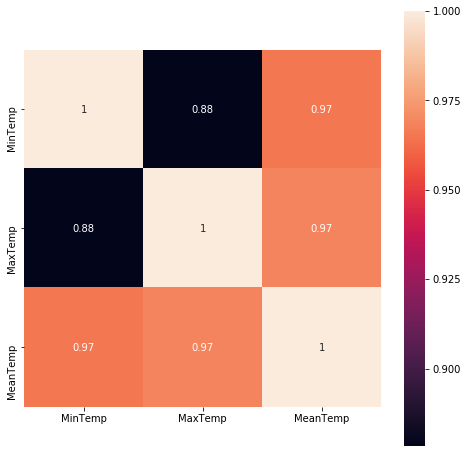

In [7]:
# Pearson Correlation matrix
plt.figure(figsize = (8,8))
sns.heatmap(df1.corr(),annot = True,square= True)

In [8]:
# Assigning X and y values for model preparation
X = df1[['MaxTemp']].values
y = df1['MeanTemp'].values

In [9]:
# Doing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Sklearn Linear Regression Model

In [10]:
# Creating the model and fitting the training data
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Making predictions 
preds = reg.predict(X_test)

In [12]:
# Calculating mse and r2 score.
mse = mean_squared_error(preds,y_test)
r2 = r2_score(preds,y_test)
print("The Mean Square Error was: {}\nThe R2 Score was {}".format(mse,r2))

The Mean Square Error was: 4.258485175573495
The R2 Score was 0.9325613848790894


#### Statsmodels Linear Regression Model

In [13]:
x = sm.add_constant(X)
results = sm.OLS(endog = y, exog=x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.834e+06
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        00:35:34   Log-Likelihood:            -2.5428e+05
No. Observations:              119040   AIC:                         5.086e+05
Df Residuals:                  119038   BIC:                         5.086e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5343      0.019   -130.949      0.000      -2.572      -2.496
x1             0.9224      0.001   1354.308      0.000       0.921       0.924
==============================================================================
Omnibus:                    71190.822   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4095982.921
Skew:                          -2.157   Prob(JB):                         0.00
Kurtosis:                      31.411   Cond. No.                         92.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

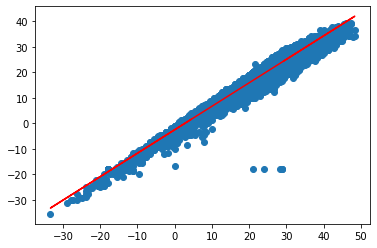

In [14]:
plt.scatter(X_test,y_test)
plt.plot(X_test,preds,color = 'r')

#### Conclusion: Both the models performed equally well using the Least Squares method but for Linear Regression Statsmodels seems to be a better package since it provides us with all the necessary details to make sure linear regression's assumptions are all true and not proven wrong. It provides us with statistics like p-value, kurtosis, skewness etc.